In [2]:
import tensorflow as tf
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Basic Classification: Classify images of clothing

In [4]:
data = keras.datasets.fashion_mnist

In [5]:
# Divide dataset into training data and testing data
# Training data will be fed into the predictive TensorFlow model 
# so that it can learn how to categorize the data
# Testing data will be used after the model is built in order
# to test its predictive accuracy
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [7]:
# Each image is represented as a 28x28 array of values for every pixel
# Range is 0 to 255, 0 is a white pixel, 255 is a black pixel
# Divide each value by 255 in order to shrink the range of values 
# that will be fed into the TensorFlow model
train_images = train_images/255.0
test_images = test_images/255.0

In [8]:
print(train_images[7])

[[0.         0.         0.         0.         0.         0.00392157
  0.00392157 0.         0.         0.         0.         0.24705882
  0.10980392 0.         0.         0.         0.12941176 0.33333333
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.00784314
  0.         0.         0.10980392 0.49411765 0.94509804 1.
  1.         1.         1.         1.         1.         0.98823529
  0.97254902 0.43529412 0.         0.         0.         0.00784314
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.00784314 0.
  0.         0.80784314 0.95686275 0.98431373 0.94509804 0.90196078
  0.93333333 0.86666667 0.80392157 0.90196078 0.94117647 0.90196078
  0.9372549  0.98431373 0.91372549 0.64705882 0.         0.
  0.00784314 0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.78039216 0.

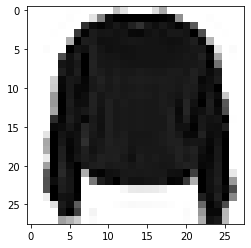

In [9]:
plt.imshow(train_images[7], cmap=plt.cm.binary)
plt.show()

In [10]:
# Building the model

# Builds sequence of layers for the model
model = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)), # 784 neurons for input layer, 1 neuron for every value in 28x28 array
    keras.layers.Dense(128, activation="relu"), # activation function: rectify linear unit
                                                # this layer will group images based on similar patterns
    keras.layers.Dense(10, activation="softmax") # 1 neuron for each of the 10 classes of clothing; 
    ])                                           # softmax activation function allows for each neuron; 
                                                 # to store probability from 0 to 1 that image belongs to the class

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 
# experiment with different optimizers and loss functions to get maximum accuracy

In [11]:
# training model
# epochs: give same images in different order to increase accuracy of model
# experiment with different numbers of epochs
model.fit(train_images, train_labels, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 53us/sample - loss: 0.5058 - accuracy: 0.8226
Epoch 2/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.3787 - accuracy: 0.8630
Epoch 3/5
60000/60000 [==============================] - 3s 47us/sample - loss: 0.3364 - accuracy: 0.8774
Epoch 4/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3153 - accuracy: 0.8850
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.2949 - accuracy: 0.8916


In [12]:
#testing model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Tested Acc: ", test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Tested Acc:  0.8642


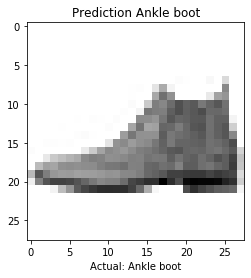

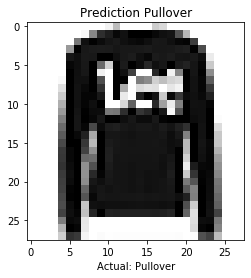

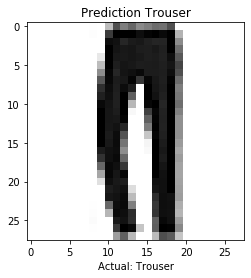

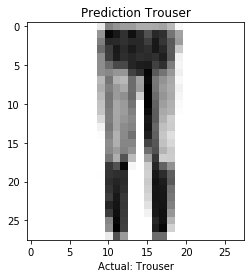

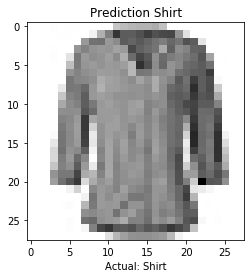

In [13]:
# take highest number as predicted value
prediction = model.predict(test_images)
for i in range(5):
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary) # show the image
    plt.xlabel("Actual: " + class_names[test_labels[i]]) # actual class
    plt.title("Prediction " + class_names[np.argmax(prediction[i])]) # predicted class
    plt.show()


In [14]:
# Text classification with TensorFlow Hub: Movie reviews

In [15]:
data = keras.datasets.imdb

# take 88000 most frequently occurring words
(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words=88000)
print(train_data[0]) # prints integer-encoded words


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [16]:
word_index = data.get_word_index()

# word mapping for data
word_index = {k:(v+3) for k, v in word_index.items()}
word_index["<PAD>"] = 0 # add padding to make all reviews same length
word_index["<START>"] = 1 
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

# swap values and keys so that integers point to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# trim training and testing data so that each review is 250 words
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=word_index["<PAD>"], 
                                                       padding="post", maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=word_index["<PAD>"], 
                                                       padding="post", maxlen=250)

# function for decoding words in review from their integer representations
def decode_review(text):
    return " ".join([reverse_word_index.get(i, "?") for i in text])
    

In [17]:
# defining model

model = keras.Sequential()
model.add(keras.layers.Embedding(88000, 16)) # turns each word into a 16-dim vector
                                             # as words are found to be more similar 
                                             # in the contexts they are being used 
                                             # angle between their vectors will decrease  
model.add(keras.layers.GlobalAveragePooling1D()) # shrinks data by averaging vectors
model.add(keras.layers.Dense(16, activation='relu')) # 16 neuron dense layer
                                                     # groups together similar words
model.add(keras.layers.Dense(1, activation='sigmoid')) # output will be 1 value between 0 and 1

model.summary()

model.compile(optimizer = "adam", loss="binary_crossentropy", metrics=["accuracy"])
# using binary_crossentropy because there are 2 possibilities for the output, 0 and 1
# 0 corresponds to negative review
# 1 corresponds to positive review 


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          1408000   
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 1,408,289
Trainable params: 1,408,289
Non-trainable params: 0
_________________________________________________________________


In [18]:
# split training data into validation data and training data
# 25000 movie reviews
# check accuracy of model based on new tweaks using new data so that
# model does not simply memorize output for each review 

x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

fitModel = model.fit(x_train, y_train, epochs=40, batch_size=512, 
                     validation_data=(x_val, y_val), verbose=1)
# experiment with number of epochs
# epochs input reviews into the model in a different order each time 
# greater number of epochs can help to increase the model's predictive accuracy
# batch_size is the number of reviews inputted to the model at once

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 63us/sample - loss: 0.6921 - accuracy: 0.5585 - val_loss: 0.6899 - val_accuracy: 0.5741
Epoch 2/40
15000/15000 [==============================] - 0s 28us/sample - loss: 0.6862 - accuracy: 0.6974 - val_loss: 0.6814 - val_accuracy: 0.6770
Epoch 3/40
15000/15000 [==============================] - 0s 29us/sample - loss: 0.6726 - accuracy: 0.6947 - val_loss: 0.6648 - val_accuracy: 0.7642
Epoch 4/40
15000/15000 [==============================] - 0s 30us/sample - loss: 0.6481 - accuracy: 0.7703 - val_loss: 0.6377 - val_accuracy: 0.7865
Epoch 5/40
15000/15000 [==============================] - 0s 29us/sample - loss: 0.6114 - accuracy: 0.8063 - val_loss: 0.5998 - val_accuracy: 0.7873
Epoch 6/40
15000/15000 [==============================] - 0s 28us/sample - loss: 0.5640 - accuracy: 0.8268 - val_loss: 0.5558 - val_accuracy: 0.8141
Epoch 7/40
15000/15000 [==============================] 

In [19]:
# testing data
results = model.evaluate(test_data, test_labels)
print(results)

25000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.3365509599494934, 0.87196]


In [20]:
# saving model
# you can save models with different parameters
# then choose the model with the highest accuracy 
model.save("model.h5")

# function for encoding review so that it is represented by a
# list of integers that each correspond to the word's index
def review_encode(s):
    encoded = [1]
    
    for word in s:
        if word.lower() in word_index:
            encoded.append(word_index[word.lower()])
        else:
            encoded.append(2)
    
    return encoded 

# loading model
model = keras.models.load_model("model.h5")

In [21]:
# runs model on any text file 
# predicts whether review is positive or negative

with open("tfsamplereview.txt", encoding="utf-8") as f:
    for line in f.readlines():
        # get rid of punctuation so that words with punctuation are 
        # not counted as separate words
        nline = line.replace(",", "").replace(".", "").replace("(", "").replace(")", "").replace(":", "").replace("\"", "").strip().split(" ")
        # encodes line as list of integers, each corresponding to a word
        encode = review_encode(nline)
        # preprocesses list of integers before it is fed to the model
        # turns input into the expected length of 250
        encode = keras.preprocessing.sequence.pad_sequences([encode], value=word_index["<PAD>"], 
                                                       padding="post", maxlen=250)
        predict = model.predict(encode)
        print(line) # prints reviews
        print(encode) # prints encoded review
        print(predict[0]) # prediction 

I have seen Joker yesterday at Venice an early ill-fated screening. We had some trouble with audio that lead to a near-hour delay, but it definitely was worth it. Joker deserved to be presented at Venice Film Festival, an event that regards cinema as a form of art, because this film is far from a blockbuster or a mere entertainer movie, as most films in the genre are. It focuses on the psyche of the main character, as it slowly crumbles under the pressure of society. And thus, Joaquin Phoenix does a wonderful performance, earning almost surely a nomination at the oscars at least. It's a take on the Joker that differs from Ledger's, but I'd say that both are equally as good. The main difference might be that Ledger's joker is a rational that acts insane, while Phoenix's is insane to the root. Despite being a movie about a superhero villain, Joker is much superior to most of the movies of the genre (I'd exclude the Dark Knight Trilogy only, but Joker is easily as good as Nolan's movies, 

In [22]:
# model's predictions

test_review = test_data[0] # tests any review from test_data
predict = model.predict([test_review])
print("Review: ")
print(decode_review(test_review))
print("Prediction: " + str(predict[0]))
print("Actual: " + str(test_labels[0]))
print(results)

Review: 
<START> please give this one a miss br br kristy swanson and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite lacklustre so all you madison fans give this a miss <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD